## Parte 1: Preparación de Archivo de Salida (Valor - Coordenada)
En esta primera fase se debe: extraer los valores recolectados por cada estación, realizar el calculo de las normales climatologicas para cada mes del año y crear un archivo de salida con la coordenada asociada a cada normal.

### Tratamiento de los <span style='color:red'> valores </span> recolectados por cada estación

In [25]:
#se crea una lista con los nombres de las estaciones con datos de precipitacion
SESTACIONES_PTPM = ['23110060','23115020','23120010','23120070','23120100','23120200','23120220',
                    '23125040','23125050','23125060','23125120','23125130','23130010','23140060',
                    '23140070','23145020','23147020','23155030','23155040','23180020','23180030',
                    '23180040','23180050','23180060','23180070','23180080','23180100','23180110',
                    '23180120','23185010','23190120','23190130','23190140','23190210','23190260',
                    '23190280','23190300','23190320','23190340','23190350','23190360','23190380',
                    '23190400','23190420','23190430','23190440','23190450','23190460','23190530',
                    '23190550','23190560','23190570','23190590','23190600','23190700','23190800',
                    '23190830','23195040','23195090','23195110','23195170','23195190','23195200',
                    '23195502','24010210','24010220','24010230','24010240','24010640','24010650',
                    '24010660','24010670','24010740','24010760','24010770','24010780','24010790',
                    '24010820','24010850','24010860','24011070','24015250','24015260','24015270',
                    '24015280','24015370','24020040','24020080','24020090','24020120','24020130',
                    '24020150','24020160','24020220','24020230','24025020','24025040','24025050',
                    '24030200','24030210','24030270','24030290','24030300','24030320','24030330',
                    '24030340','24030370','24030630','24030680','24030730','24030740','24030750',
                    '24030850','24030950','24035260','24035270','24035400','24037390','24040050',
                    '24040060','24050060','24050070','24050080','24050100','24050110','24055030',
                    '24055040','24060040','24060050','24060060','24060070','24060080','24065010',
                    '24065020','24065030','37010050','37010060','37015020']


In [26]:
#se crea una lista con los nombres de las estaciones con datos de temperatura
SESTACIONES_TSSM = ['23115020','23125040','23125050','23125060','23125120','23125130','23145020',
                    '23155030','23155040','23185010'           ,'23195040','23195090','23195110',
                    '23195170','23195200','23195502','24015250','24015260','24015270','24015280',
                    '24015370','24025020','24025040','24025050','24035260','24035270','24035400',
                    '24055030','24055040','24065010','24065030','37015020'] #except 23190350

In [27]:
#se convierte datos de .data a .csv precipitacion
for estacion in SESTACIONES_PTPM:
    #read input file
    fin = open('C:\Users\\verit\Documents\Datos para la tesis\Santander\PQRS_20209050094292\PTPM_CON@'+str(estacion)+'.data', "rt")
    #read file contents to string
    data = fin.read()
    #replace all occurrences of the required string
    data = data.replace('|', ',')
    #close the input file
    fin.close()
    #open the input file in write mode
    fin = open('C:\Users\\verit\Documents\Datos para la tesis\Santander\PQRS_20209050094292\PTPM_CON@'+str(estacion)+'.csv', "wt")
    #overrite the input file with the resulting data
    fin.write(data)
    #close the file
    fin.close()

In [ ]:
#convertir de .data a .csv temperatura
for estacion in SESTACIONES_TSSM:
    #read input file
    fin = open('C:\Users\\verit\Documents\Datos para la tesis\Santander\PQRS_20209050094292\TSSM_CON@'+str(estacion)+'.data', "rt")
    #read file contents to string
    data = fin.read()
    #replace all occurrences of the required string
    data = data.replace('|', ',')
    #close the input file
    fin.close()
    #open the input file in write mode
    fin = open('C:\Users\\verit\Documents\Datos para la tesis\Santander\PQRS_20209050094292\TSSM_CON@'+str(estacion)+'.csv', "wt")
    #overrite the input file with the resulting data
    fin.write(data)
    #close the file
    fin.close()

### Tratamiento de las <span style='color:blue'> coordenadas asociadas </span> a cada estación.

In [28]:
#se filtran estaciones que hayan operado entre 1981-2011 y que tengan valores de precipitacion mayor a 30 años
import pandas as pd

estacionesP = []

for estacion in SESTACIONES_PTPM: 
    #leer cada una de los archivos de estaciones
    df = pd.read_csv('c:\\Users\\verit\\Documents\\Datos para la tesis\\Santander\\PQRS_20209050094292\\PTPM_CON@'+str(estacion)+'.csv') #leer todos los archivos

    #convertir fechas a formato datetime
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    
    #Filtro 1: datos entre 1980-2011
    mask = (df['Fecha'].dt.year > 1980) & (df['Fecha'].dt.year <= 2011)
    filtro1_df = df.loc[mask] 
        
    #defino primer y ultimo año datos estacion
    inicio = filtro1_df.iloc[0,0].year
    final = filtro1_df.iloc[-1,0].year
    
    diff = final-inicio
    
    print estacion,inicio, final, diff
    
    #Filtro 2: datos estaciones mayor a 30 años
    #rango = final - inicio >= 30
    #if rango:
    #    estacionesP.append(estacion)
    #else: 
    #    continue

23110060 1984 2010 26
23115020 1981 1985 4
23120010 1981 2011 30
23120070 1981 1995 14
23120100 1984 1984 0
23120200 1981 2011 30
23120220 1981 2011 30
23125040 1981 2011 30
23125050 1981 2011 30
23125060 1981 2011 30
23125120 1981 2011 30
23125130 1981 2009 28
23130010 1981 2011 30
23140060 1984 1989 5
23140070 1984 2011 27
23145020 1981 2011 30
23147020 1981 2011 30
23155030 1981 2011 30
23155040 1981 2011 30
23180020 1981 2011 30
23180030 1981 2005 24
23180040 1981 2011 30
23180050 1981 2011 30
23180060 1981 2002 21
23180070 1981 2011 30
23180080 1981 2011 30
23180100 1981 2011 30
23180110 1981 2011 30
23180120 1981 2011 30
23185010 1981 2011 30
23190120 1984 1984 0
23190130 1981 2011 30
23190140 1981 2011 30
23190210 1989 2011 22
23190260 1981 2011 30
23190280 1981 2011 30
23190300 1981 2011 30
23190320 1992 2011 19
23190340 1981 2011 30
23190350 1981 2011 30
23190360 1982 2011 29
23190380 1981 2011 30
23190400 1981 2011 30
23190420 1981 1998 17
23190430 1982 1982 0
23190440 1981 2

In [29]:
#se filtran estaciones que hayan operado entre 1981-2011 y que tengan valores de temperatura mayor a 30 años
import pandas as pd

estacionesT = []

for estacion in SESTACIONES_TSSM: 
    #leer cada una de los archivos de estaciones
    df = pd.read_csv('c:\\Users\\verit\\Documents\\Datos para la tesis\\Santander\\PQRS_20209050094292\\TSSM_CON@'+str(estacion)+'.csv') #leer todos los archivos

    #convertir fechas a formato datetime
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    
    #Filtro 1: datos entre 1980-2011
    mask = (df['Fecha'].dt.year > 1980) & (df['Fecha'].dt.year <= 2011)
    filtro1_df = df.loc[mask]

    #defino primer y ultimo año datos estacion
    inicio = filtro1_df.iloc[0,0].year
    final = filtro1_df.iloc[-1,0].year
    
    diff = final-inicio
    
    print estacion, inicio, final, diff
    
    #Filtro 2: datos estaciones mayor a 27 años
    #rango = final - inicio >= 27
    #if rango:
    #    estacionesT.append(estacion)
    #else: 
    #    continue

23115020 1983 1983 0
23125040 1982 2008 26
23125050 1982 2011 29
23125060 1983 2011 28
23125120 1983 2011 28
23125130 1983 2009 26
23145020 1982 2011 29
23155030 1983 2011 28
23155040 1982 2011 29
23185010 1982 2011 29
23195040 1982 2003 21
23195090 1982 2011 29
23195110 1983 2011 28
23195170 1983 1991 8
23195200 1983 2011 28
23195502 1983 2011 28
24015250 1982 2011 29
24015260 1982 2011 29
24015270 1983 2011 28
24015280 1983 2011 28
24015370 2010 2011 1
24025020 1983 2010 27
24025040 1983 2011 28
24025050 1983 2011 28
24035260 1983 2011 28
24035270 1982 2006 24
24035400 2006 2011 5
24055030 1982 2011 29
24055040 1984 2011 27
24065010 1984 2011 27
24065030 1996 2010 14
37015020 1983 2011 28


In [ ]:
#se sube el documento T con coordenadas de todas las estaciones en santander
import pandas as pd
t = pd.read_csv('c:\\Users\\verit\\Documents\\Datos para la tesis\\CNE_IDEAM.csv')

In [ ]:
#Filtro datos de estaciones que cumplen condicion de 30 años para ser normalizadas precipitación
rP = t[t['CODIGO'].isin(estacionesP)]
#ordeno el dataframe de acuerdo a orden de lista estaciones
rP.sort_values('CODIGO',inplace=True,ascending=True)
#listas de salida
latitudP = rP['latitud'].tolist()
longitudP = rP['longitud'].tolist()

In [ ]:
#Filtro datos de estaciones que cumplen condicion de 30 años para ser normalizadas precipitación
rT = t[t['CODIGO'].isin(estacionesT)]
#ordeno el dataframe de acuerdo a orden de lista estaciones
rT.sort_values('CODIGO',inplace=True,ascending=True)
#listas de salida
latitudT = rT['latitud'].tolist()
longitudT = rT['longitud'].tolist()

### Cálculo de las <span style='color:green'> normales climatológicas </span> de cada mes.

In [ ]:
import pandas as pd

months = [i for i in range(1,13)]

for month in months:
    Valor = []
    
    for estacion in estacionesP: 
        #leer cada una de los archivos de estaciones
        df = pd.read_csv('c:\\Users\\verit\\Documents\\Datos para la tesis\\Santander\\PQRS_20209050094292\\PTPM_CON@'+str(estacion)+'.csv') #leer todos los archivos

        #convertir fechas a formato datetime
        df['Fecha'] = pd.to_datetime(df['Fecha'])
    
        #Filtro 1: datos entre 1980-2011
        mask = (df['Fecha'].dt.year > 1980) & (df['Fecha'].dt.year <= 2011)
        filtro1_df = df.loc[mask] 
        
        #defino primer y ultimo año datos estacion
        inicio = filtro1_df.iloc[0,0].year
        final = filtro1_df.iloc[-1,0].year
    
        #Filtro 2: datos estaciones mayor a 30 años
        rango = final - inicio >= 30
        if rango:
            mask = (filtro1_df['Fecha'].dt.year >= inicio) & (filtro1_df['Fecha'].dt.year <= final)
            filtro2_df = filtro1_df.loc[mask]
        else: 
            continue
    
        #Filtro 3: Calculo el promedio de cada estacion para cada mes
        mask = filtro2_df['Fecha'].dt.month == month
        filtro3_df = filtro2_df.loc[mask]
        valor = filtro3_df["Valor"].mean()
        Valor.append(valor) #se añaden a una lista
        
    #print estaciones
    tab = pd.DataFrame.from_dict({"Longitud":longitudP, "Latitud": latitudP,"Valor": Valor,"Codigo": estacionesP})
    tab.to_csv(r'c:\\Users\\verit\\Documents\\Datos para la tesis\\Santander\\SN'+str(month)+'_PTPM.csv', index = False)

In [ ]:
import pandas as pd

months = [i for i in range(1,13)]

for month in months:
    Valor = []
    
    for estacion in estacionesT: 
        #leer cada una de los archivos de estaciones
        df = pd.read_csv('c:\\Users\\verit\\Documents\\Datos para la tesis\\Santander\\PQRS_20209050094292\\TSSM_CON@'+str(estacion)+'.csv') #leer todos los archivos

        #convertir fechas a formato datetime
        df['Fecha'] = pd.to_datetime(df['Fecha'])
    
        #Filtro 1: datos entre 1980-2011
        mask = (df['Fecha'].dt.year > 1980) & (df['Fecha'].dt.year <= 2011)
        filtro1_df = df.loc[mask] 
        
        #defino primer y ultimo año datos estacion
        inicio = filtro1_df.iloc[0,0].year
        final = filtro1_df.iloc[-1,0].year
    
        #Filtro 2: datos estaciones mayor a 27 años
        rango = final - inicio >= 27
        if rango:
            mask = (filtro1_df['Fecha'].dt.year >= inicio) & (filtro1_df['Fecha'].dt.year <= final)
            filtro2_df = filtro1_df.loc[mask]
        else: 
            continue
    
        #Filtro 3: Calculo el promedio de cada estacion para cada mes
        mask = filtro2_df['Fecha'].dt.month == month
        filtro3_df = filtro2_df.loc[mask]
        valor = filtro3_df["Valor"].mean()
        Valor.append(valor) #se añaden a una lista
        
    #print estaciones
    tab = pd.DataFrame.from_dict({"Longitud":longitudT, "Latitud": latitudT,"Valor": Valor,"Codigo": estacionesT})
    tab.to_csv(r'c:\\Users\\verit\\Documents\\Datos para la tesis\\Santander\\SN'+str(month)+'_TSSM.csv', index = False)

In [ ]:
import pandas as pd

months = [i for i in range(1,13)]
#years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

for month in months:
    Valor = []
    for estacion in estacionesP:    
        df = pd.read_csv('c:\\Users\\verit\\Documents\\Datos para la tesis\\Santander\\PQRS_20209050094292\\PTPM_CON@'+str(estacion)+'.csv') #leer todos los archivos
        
        #convertir fechas a formato datetime
        df['Fecha'] = pd.to_datetime(df['Fecha'])
    
        #Filtro 1: datos entre 2010-2020
        mask = (df['Fecha'].dt.year == 2018)
        filtro1_df = df.loc[mask] 
        
        #Filtro 3: Calculo el promedio de cada estacion para cada mes
        mask = filtro1_df['Fecha'].dt.month == month
        filtro2_df = filtro1_df.loc[mask]
        valor = filtro2_df["Valor"].mean()
        Valor.append(valor) #se añaden a una lista
        
    tab = pd.DataFrame.from_dict({"Longitud":longitudP, "Latitud": latitudP,"Valor": Valor,"Codigo": estacionesP})
    tab.to_csv(r'c:\\Users\\verit\\Documents\\Datos para la tesis\\Santander\\2018SN'+str(month)+'_PTPM.csv', index = False)

In [ ]:
import pandas as pd

months = [i for i in range(1,13)]

for month in months:
    Valor = []
    for estacion in estacionesT:    
        df = pd.read_csv('c:\\Users\\verit\\Documents\\Datos para la tesis\\Santander\\PQRS_20209050094292\\TSSM_CON@'+str(estacion)+'.csv') #leer todos los archivos
        
        #convertir fechas a formato datetime
        df['Fecha'] = pd.to_datetime(df['Fecha'])
    
        #Filtro 1: datos entre 2010-2020
        mask = (df['Fecha'].dt.year == 2018)
        filtro1_df = df.loc[mask] 
        
        #Filtro 3: Calculo el promedio de cada estacion para cada mes
        mask = filtro1_df['Fecha'].dt.month == month
        filtro2_df = filtro1_df.loc[mask]
        valor = filtro2_df["Valor"].mean()
        Valor.append(valor) #se añaden a una lista
        
    tab = pd.DataFrame.from_dict({"Longitud":longitudT, "Latitud": latitudT,"Valor": Valor,"Codigo": estacionesT})
    tab.to_csv(r'c:\\Users\\verit\\Documents\\Datos para la tesis\\Santander\\2018SN'+str(month)+'_TSSM.csv', index = False)

## Parte 2: Plotting o Graficado
En esta segunda fase se debe representar el archivo .cvs (valor - coordenada) de forma grafica.

In [1]:
import os
os.environ['PROJ_LIB']='C:/Users/verit/anaconda3/envs/py27/Library/share'

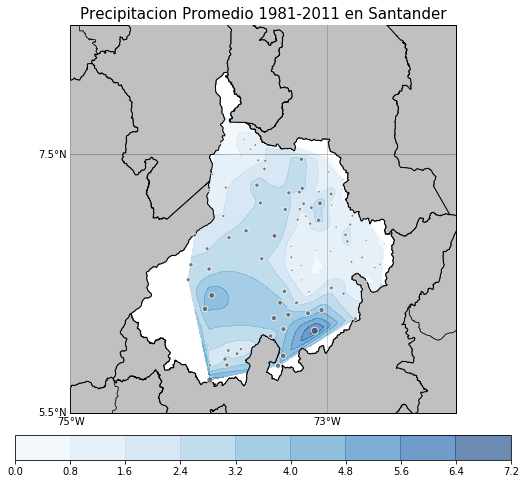

In [4]:
#Se importan las librerias
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from matplotlib.mlab import griddata
import shapefile  # used to read my shapefiles
from matplotlib.patches import Polygon # used to import Polygon
from matplotlib.collections import PatchCollection # also used to cut boundaries

# Normalize Function
from matplotlib.colors import Normalize
norm = Normalize()

# Se establece el archivo de entrada
data = pd.read_csv('C:/Users/verit/Documents/Datos para la tesis/Santander/SN1_PTPM.csv')

#Se establece el tamaño de la grafica
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

#Se define la extensión del mapa
lllat = 5.5
urlat = 8.5
lllon = -75
urlon = -72

#Se establece instancia de Basemap
m = Basemap(projection = 'merc',
            llcrnrlat = lllat,
            urcrnrlat = urlat,
            llcrnrlon = lllon,
            urcrnrlon = urlon,
            resolution = 'f')

# Se transforma coordenadas lon / lat a proyecciones del mapa
data['projected_lon'], data['projected_lat'] = m(*(data.Longitud.values, data.Latitud.values))

# grid data
numcols, numrows = 1000, 1000
xi = np.linspace(data['projected_lon'].min(), data['projected_lon'].max(), numcols)
yi = np.linspace(data['projected_lat'].min(), data['projected_lat'].max(), numrows)
xi, yi = np.meshgrid(xi, yi)

# interpolate
x, y, z = data['projected_lon'].values, data['projected_lat'].values, data.Valor.values
zi = griddata(x, y, z, xi, yi)

# load the shapefile, use the name 'states' 
m.readshapefile(r"C:\Users\verit\Documents\Datos para la tesis\Santander\MGN2017_00_COLOMBIA\ADMINISTRATIVO\MGN_DPTO_POLITICO",name='states',drawbounds=True)

#apply mask nearest states 
state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['DPTO_CNMBR'])
    
# get Santander and draw the filled polygon
seg1 = m.states[state_names.index(u'BOL\xcdVAR')]
seg2 = m.states[state_names.index(u'BOYAC\xc1')]
seg3 = m.states[state_names.index('ANTIOQUIA')]
seg4 = m.states[state_names.index('NORTE DE SANTANDER')]
seg5 = m.states[state_names.index('CESAR')]
seg6 = m.states[state_names.index('SANTANDER')]

#poly = Polygon(seg, facecolor='white',edgecolor='black', zorder=17)
poly1 = Polygon(seg1)
poly2 = Polygon(seg2)
poly3 = Polygon(seg3)
poly4 = Polygon(seg4)
poly5 = Polygon(seg5)
poly6 = Polygon(seg6,facecolor='white',edgecolor='black', zorder=2)
ax.add_patch(poly6)

ax.add_collection(PatchCollection([poly1,poly2,poly3,poly4,poly5], \
                                   zorder=4, \
                                   facecolor='#C0C0C0', \
                                   edgecolor='black' ) )
# draw map details
m.drawmapboundary(fill_color = 'white')
m.fillcontinents(color='#C0C0C0', lake_color='#7093DB',zorder=1)

m.drawparallels(
    np.arange(lllat, urlat, 2.),
    color = 'black', linewidth = 0.5,
    zorder=6,
    labels=[True, False, False, False])
m.drawmeridians(
    np.arange(lllon, urlon, 2.),
    color = '0.25', linewidth = 0.5,
    zorder=6,
    labels=[False, False, False, True])

# contour plot (color: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)
con = m.contourf(xi, yi, zi, zorder=3, alpha=0.6, cmap='Blues') 

# scatter plot
m.scatter(
    data['projected_lon'],
    data['projected_lat'],
    color='#545454',
    edgecolor='#ffffff',
    alpha=.75,
    s=50 * norm(data.Valor.values),
    cmap='Blues',
    ax=ax,
    vmin=zi.min(), vmax=zi.max(), zorder=5) #points stations

# agregar barra de color y titulo
cbar = plt.colorbar(con, orientation='horizontal', fraction=.057, pad=0.05)
plt.title("Precipitacion Promedio 1981-2011 en Santander",fontsize=15)

#agregar nombre departamentos alrededor
#plt.text(7.7,-74.5, 'Bolivar', fontsize=12);

plt.show()


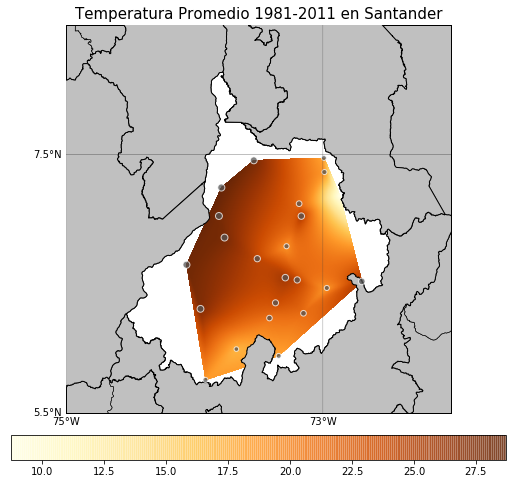

In [34]:
#Se importan las librerias
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from matplotlib.mlab import griddata
import shapefile  # used to read my shapefiles
from matplotlib.patches import Polygon # used to import Polygon
from matplotlib.collections import PatchCollection # also used to cut boundaries

# Normalize Function
from matplotlib.colors import Normalize
norm = Normalize()

# Se establece el archivo de entrada
data = pd.read_csv('C:/Users/verit/Documents/Datos para la tesis/Santander/SN7_TSSM.csv')

#Se establece el tamaño de la grafica
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

#Se define la extensión del mapa
lllat = 5.5
urlat = 8.5
lllon = -75
urlon = -72

#Se establece instancia de Basemap
m = Basemap(projection = 'merc',
            llcrnrlat = lllat,
            urcrnrlat = urlat,
            llcrnrlon = lllon,
            urcrnrlon = urlon,
            resolution = 'f')

# Se transforma coordenadas lon / lat a proyecciones del mapa
data['projected_lon'], data['projected_lat'] = m(*(data.Longitud.values, data.Latitud.values))

# grid data
numcols, numrows = 1000, 1000
xi = np.linspace(data['projected_lon'].min(), data['projected_lon'].max(), numcols)
yi = np.linspace(data['projected_lat'].min(), data['projected_lat'].max(), numrows)
xi, yi = np.meshgrid(xi, yi)

# interpolate
x, y, z = data['projected_lon'].values, data['projected_lat'].values, data.Valor.values
zi = griddata(x, y, z, xi, yi)

# load the shapefile, use the name 'states' 
m.readshapefile(r"C:\Users\verit\Documents\Datos para la tesis\Santander\MGN2017_00_COLOMBIA\ADMINISTRATIVO\MGN_DPTO_POLITICO",name='states',drawbounds=True)

#apply mask nearest states 
state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['DPTO_CNMBR'])
    
# get Santander and draw the filled polygon
seg1 = m.states[state_names.index(u'BOL\xcdVAR')]
seg2 = m.states[state_names.index(u'BOYAC\xc1')]
seg3 = m.states[state_names.index('ANTIOQUIA')]
seg4 = m.states[state_names.index('NORTE DE SANTANDER')]
seg5 = m.states[state_names.index('CESAR')]
seg6 = m.states[state_names.index('SANTANDER')]

#poly = Polygon(seg, facecolor='white',edgecolor='black', zorder=17)
poly1 = Polygon(seg1)
poly2 = Polygon(seg2)
poly3 = Polygon(seg3)
poly4 = Polygon(seg4)
poly5 = Polygon(seg5)
poly6 = Polygon(seg6,facecolor='white',edgecolor='black', zorder=2)
ax.add_patch(poly6)

ax.add_collection(PatchCollection([poly1,poly2,poly3,poly4,poly5], \
                                   zorder=4, \
                                   facecolor='#C0C0C0', \
                                   edgecolor='black' ) )
# draw map details
m.drawmapboundary(fill_color = 'white')
m.fillcontinents(color='#C0C0C0', lake_color='#7093DB',zorder=1)

m.drawparallels(
    np.arange(lllat, urlat, 2.),
    color = 'black', linewidth = 0.5,
    zorder=6,
    labels=[True, False, False, False])
m.drawmeridians(
    np.arange(lllon, urlon, 2.),
    color = '0.25', linewidth = 0.5,
    zorder=6,
    labels=[False, False, False, True])

# contour plot (color: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)
con = m.pcolormesh(xi, yi, zi, zorder=3, alpha=0.6, cmap='YlOrBr') 

# scatter plot
m.scatter(
    data['projected_lon'],
    data['projected_lat'],
    color='#545454',
    edgecolor='#ffffff',
    alpha=.75,
    s=50 * norm(data.Valor.values),
    cmap='Blues',
    ax=ax,
    vmin=zi.min(), vmax=zi.max(), zorder=5) #points stations

# agregar barra de color y titulo
cbar = plt.colorbar(con, orientation='horizontal', fraction=.057, pad=0.05)
plt.title("Temperatura Promedio 1981-2011 en Santander",fontsize=15)

#agregar nombre departamentos alrededor
#plt.text(7.7,-74.5, 'Bolivar', fontsize=12);

plt.show()
